In [57]:
import tensorflow as tf

In [58]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
        print(e)

In [59]:
a = tf.constant(1)
b = tf.constant(2)
c = tf.constant(3)

z = 2*(a-b) + c

print('2*(a-b) + c =>', z.numpy())

2*(a-b) + c => 1


In [60]:
g = tf.Graph()

with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')

    z = 2*(a-b) + c

with tf.compat.v1.Session(graph=g) as sess:
    print('2*(a-b) + c =>', sess.run(z))

2*(a-b) + c => 1


In [61]:
g.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=AddV2>]

In [62]:
g.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

In [63]:
@tf.function
def simple_func():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')

    z = 2*(a-b) + c
    return z

print('2*(a-b) + c =>', simple_func().numpy())

2*(a-b) + c => 1


In [64]:
def simple_func():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')

    z = 2*(a-b) + c
    return z

simple_func = tf.function(simple_func)
print('2*(a-b) + c =>', simple_func().numpy())

2*(a-b) + c => 1


In [65]:
con_func = simple_func.get_concrete_function()
con_func.graph.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [66]:
import numpy as np

In [67]:
g1 = tf.Graph()

with g1.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                               [5, 6, 7, 8]]), name='w1')

print(w1)

<tf.Variable 'w1:0' shape=(2, 4) dtype=int64>


In [68]:
g1.get_operations()

[<tf.Operation 'w1/Initializer/initial_value' type=Const>,
 <tf.Operation 'w1' type=VarHandleOp>,
 <tf.Operation 'w1/IsInitialized/VarIsInitializedOp' type=VarIsInitializedOp>,
 <tf.Operation 'w1/Assign' type=AssignVariableOp>,
 <tf.Operation 'w1/Read/ReadVariableOp' type=ReadVariableOp>]

In [69]:
with g1.as_default():
    init = tf.compat.v1.global_variables_initializer()
    print(init.node_def)

name: "init"
op: "NoOp"
input: "^w1/Assign"



In [70]:
with g1.as_default():
    w1 = w1 + 1
    print(w1)
    
with tf.compat.v1.Session(graph=g1) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

Tensor("add:0", shape=(2, 4), dtype=int64)
[[2 3 4 5]
 [6 7 8 9]]
[[2 3 4 5]
 [6 7 8 9]]


In [71]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                               [5, 6, 7, 8]]), name='w1')
    w1 = w1.assign(w1 + 1)

with tf.compat.v1.Session(graph=g2) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [72]:
w2 = tf.Variable(np.array([[1, 2, 3, 4],
                           [5, 6, 7, 8]]), name='w2')
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[1, 2, 3, 4],
       [5, 6, 7, 8]])>


In [73]:
print(w2 + 1)

tf.Tensor(
[[2 3 4 5]
 [6 7 8 9]], shape=(2, 4), dtype=int64)


In [74]:
w2.assign(w2 + 1)
print(w2.numpy())
w2.assign(w2 + 1)
print(w2.numpy())

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [75]:
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[ 3,  4,  5,  6],
       [ 7,  8,  9, 10]])>


In [76]:
#pip install matplotlib

In [77]:
import matplotlib.pyplot as plt

In [78]:
np.random.seed(0)

In [79]:
def make_ramdom_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    
    for t in x:
        r = np.random.normal(loc=0.0,
                             scale=(0.5 + t*t/3))
        y.append(r)
    return x, 1.726*x - 0.84 + np.array(y)

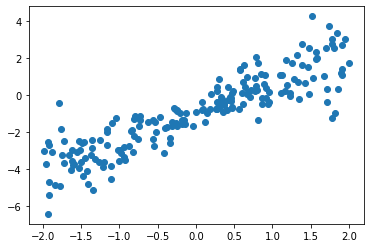

In [80]:
x, y = make_ramdom_data()

plt.plot(x,y, 'o')
plt.show()

In [81]:
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [82]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105 [==============================] - 0s 2ms/sample - loss: 3.5843 - val_loss: 2.2386
Epoch 2/500
105/105 [==============================] - 0s 123us/sample - loss: 3.0694 - val_loss: 1.9603
Epoch 3/500
105/105 [==============================] - 0s 145us/sample - loss: 2.5965 - val_loss: 1.7557
Epoch 4/500
105/105 [==============================] - 0s 148us/sample - loss: 2.2480 - val_loss: 1.5780
Epoch 5/500
105/105 [==============================] - 0s 150us/sample - loss: 1.9482 - val_loss: 1.4427
Epoch 6/500
105/105 [==============================] - 0s 135us/sample - loss: 1.7186 - val_loss: 1.3374
Epoch 7/500
105/105 [==============================] - 0s 123us/sample - loss: 1.5495 - val_loss: 1.2652
Epoch 8/500
105/105 [==============================] - 0s 136us/sample - loss: 1.4210 - val_loss: 1.1954
Epoch 9/500
105/105 [==============================] - 0s 156us/sample - loss: 1.2937 - val_loss: 1.1233
Epoch 10/500

Epoch 78/500
105/105 [==============================] - 0s 143us/sample - loss: 0.7578 - val_loss: 0.8962
Epoch 79/500
105/105 [==============================] - 0s 145us/sample - loss: 0.7577 - val_loss: 0.8958
Epoch 80/500
105/105 [==============================] - 0s 143us/sample - loss: 0.7598 - val_loss: 0.8968
Epoch 81/500
105/105 [==============================] - 0s 141us/sample - loss: 0.7580 - val_loss: 0.8961
Epoch 82/500
105/105 [==============================] - 0s 146us/sample - loss: 0.7568 - val_loss: 0.8958
Epoch 83/500
105/105 [==============================] - 0s 136us/sample - loss: 0.7568 - val_loss: 0.8963
Epoch 84/500
105/105 [==============================] - 0s 133us/sample - loss: 0.7585 - val_loss: 0.8963
Epoch 85/500
105/105 [==============================] - 0s 131us/sample - loss: 0.7571 - val_loss: 0.8960
Epoch 86/500
105/105 [==============================] - 0s 142us/sample - loss: 0.7578 - val_loss: 0.8956
Epoch 87/500
105/105 [========================

105/105 [==============================] - 0s 157us/sample - loss: 0.7565 - val_loss: 0.8979
Epoch 155/500
105/105 [==============================] - 0s 148us/sample - loss: 0.7562 - val_loss: 0.8972
Epoch 156/500
105/105 [==============================] - 0s 158us/sample - loss: 0.7572 - val_loss: 0.8956
Epoch 157/500
105/105 [==============================] - 0s 146us/sample - loss: 0.7563 - val_loss: 0.8966
Epoch 158/500
105/105 [==============================] - 0s 152us/sample - loss: 0.7563 - val_loss: 0.9002
Epoch 159/500
105/105 [==============================] - 0s 148us/sample - loss: 0.7566 - val_loss: 0.9001
Epoch 160/500
105/105 [==============================] - 0s 143us/sample - loss: 0.7579 - val_loss: 0.9047
Epoch 161/500
105/105 [==============================] - 0s 144us/sample - loss: 0.7568 - val_loss: 0.9020
Epoch 162/500
105/105 [==============================] - 0s 134us/sample - loss: 0.7578 - val_loss: 0.9030
Epoch 163/500
105/105 [============================

105/105 [==============================] - 0s 132us/sample - loss: 0.7566 - val_loss: 0.8992
Epoch 231/500
105/105 [==============================] - 0s 129us/sample - loss: 0.7561 - val_loss: 0.9010
Epoch 232/500
105/105 [==============================] - 0s 136us/sample - loss: 0.7563 - val_loss: 0.9009
Epoch 233/500
105/105 [==============================] - 0s 128us/sample - loss: 0.7556 - val_loss: 0.9003
Epoch 234/500
105/105 [==============================] - 0s 126us/sample - loss: 0.7572 - val_loss: 0.9007
Epoch 235/500
105/105 [==============================] - 0s 143us/sample - loss: 0.7568 - val_loss: 0.8994
Epoch 236/500
105/105 [==============================] - 0s 235us/sample - loss: 0.7567 - val_loss: 0.8951
Epoch 237/500
105/105 [==============================] - 0s 141us/sample - loss: 0.7567 - val_loss: 0.8958
Epoch 238/500
105/105 [==============================] - 0s 139us/sample - loss: 0.7578 - val_loss: 0.8950
Epoch 239/500
105/105 [============================

105/105 [==============================] - 0s 135us/sample - loss: 0.7562 - val_loss: 0.9175
Epoch 307/500
105/105 [==============================] - 0s 129us/sample - loss: 0.7581 - val_loss: 0.9147
Epoch 308/500
105/105 [==============================] - 0s 128us/sample - loss: 0.7565 - val_loss: 0.9138
Epoch 309/500
105/105 [==============================] - 0s 134us/sample - loss: 0.7564 - val_loss: 0.9100
Epoch 310/500
105/105 [==============================] - 0s 125us/sample - loss: 0.7577 - val_loss: 0.9089
Epoch 311/500
105/105 [==============================] - 0s 127us/sample - loss: 0.7563 - val_loss: 0.9098
Epoch 312/500
105/105 [==============================] - 0s 140us/sample - loss: 0.7575 - val_loss: 0.9065
Epoch 313/500
105/105 [==============================] - 0s 136us/sample - loss: 0.7562 - val_loss: 0.9105
Epoch 314/500
105/105 [==============================] - 0s 137us/sample - loss: 0.7564 - val_loss: 0.9093
Epoch 315/500
105/105 [============================

105/105 [==============================] - 0s 134us/sample - loss: 0.7565 - val_loss: 0.9112
Epoch 383/500
105/105 [==============================] - 0s 132us/sample - loss: 0.7563 - val_loss: 0.9116
Epoch 384/500
105/105 [==============================] - 0s 128us/sample - loss: 0.7565 - val_loss: 0.9092
Epoch 385/500
105/105 [==============================] - 0s 136us/sample - loss: 0.7564 - val_loss: 0.9058
Epoch 386/500
105/105 [==============================] - 0s 136us/sample - loss: 0.7570 - val_loss: 0.9052
Epoch 387/500
105/105 [==============================] - 0s 126us/sample - loss: 0.7557 - val_loss: 0.9057
Epoch 388/500
105/105 [==============================] - 0s 143us/sample - loss: 0.7560 - val_loss: 0.9061
Epoch 389/500
105/105 [==============================] - 0s 139us/sample - loss: 0.7558 - val_loss: 0.9055
Epoch 390/500
105/105 [==============================] - 0s 134us/sample - loss: 0.7562 - val_loss: 0.9032
Epoch 391/500
105/105 [============================

105/105 [==============================] - 0s 136us/sample - loss: 0.7577 - val_loss: 0.9091
Epoch 459/500
105/105 [==============================] - 0s 127us/sample - loss: 0.7560 - val_loss: 0.9077
Epoch 460/500
105/105 [==============================] - 0s 127us/sample - loss: 0.7561 - val_loss: 0.9086
Epoch 461/500
105/105 [==============================] - 0s 135us/sample - loss: 0.7570 - val_loss: 0.9102
Epoch 462/500
105/105 [==============================] - 0s 141us/sample - loss: 0.7564 - val_loss: 0.9099
Epoch 463/500
105/105 [==============================] - 0s 136us/sample - loss: 0.7568 - val_loss: 0.9037
Epoch 464/500
105/105 [==============================] - 0s 125us/sample - loss: 0.7562 - val_loss: 0.9013
Epoch 465/500
105/105 [==============================] - 0s 131us/sample - loss: 0.7581 - val_loss: 0.9002
Epoch 466/500
105/105 [==============================] - 0s 131us/sample - loss: 0.7564 - val_loss: 0.8973
Epoch 467/500
105/105 [============================

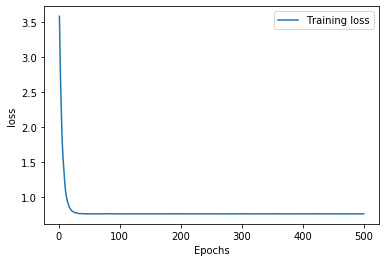

In [85]:
epochs = np.arange(1, 500+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [30]:
from tensorflow.keras import Model, Input

In [31]:
input = tf.keras.Input(shape=(1,))
output = tf.keras.layers.Dense(1)(input)

In [32]:
dense = tf.keras.layers.Dense(1)
output = dense(input)

In [33]:
dense = tf.keras.layers.Dense(1)
dense.__call__(input)

<tf.Tensor 'dense_3/Identity:0' shape=(None, 1) dtype=float32>

In [34]:
model = tf.keras.Model(input, output)

In [35]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105 [==============================] - 0s 2ms/sample - loss: 8.1836 - val_loss: 4.8634
Epoch 2/500
105/105 [==============================] - 0s 126us/sample - loss: 6.7137 - val_loss: 4.1428
Epoch 3/500
105/105 [==============================] - 0s 139us/sample - loss: 5.6262 - val_loss: 3.5354
Epoch 4/500
105/105 [==============================] - 0s 132us/sample - loss: 4.6912 - val_loss: 3.0735
Epoch 5/500
105/105 [==============================] - 0s 155us/sample - loss: 3.9858 - val_loss: 2.6653
Epoch 6/500
105/105 [==============================] - 0s 153us/sample - loss: 3.3637 - val_loss: 2.3041
Epoch 7/500
105/105 [==============================] - 0s 143us/sample - loss: 2.8265 - val_loss: 2.0468
Epoch 8/500
105/105 [==============================] - 0s 143us/sample - loss: 2.4365 - val_loss: 1.8254
Epoch 9/500
105/105 [==============================] - 0s 152us/sample - loss: 2.0978 - val_loss: 1.6499
Epoch 10/500

Epoch 78/500
105/105 [==============================] - 0s 123us/sample - loss: 0.7562 - val_loss: 0.8968
Epoch 79/500
105/105 [==============================] - 0s 126us/sample - loss: 0.7561 - val_loss: 0.8992
Epoch 80/500
105/105 [==============================] - 0s 139us/sample - loss: 0.7570 - val_loss: 0.9045
Epoch 81/500
105/105 [==============================] - 0s 125us/sample - loss: 0.7563 - val_loss: 0.9030
Epoch 82/500
105/105 [==============================] - 0s 125us/sample - loss: 0.7561 - val_loss: 0.9038
Epoch 83/500
105/105 [==============================] - 0s 124us/sample - loss: 0.7561 - val_loss: 0.9033
Epoch 84/500
105/105 [==============================] - 0s 143us/sample - loss: 0.7563 - val_loss: 0.9104
Epoch 85/500
105/105 [==============================] - 0s 135us/sample - loss: 0.7561 - val_loss: 0.9067
Epoch 86/500
105/105 [==============================] - 0s 131us/sample - loss: 0.7569 - val_loss: 0.9032
Epoch 87/500
105/105 [========================

Epoch 155/500
105/105 [==============================] - 0s 137us/sample - loss: 0.7563 - val_loss: 0.9022
Epoch 156/500
105/105 [==============================] - 0s 146us/sample - loss: 0.7556 - val_loss: 0.9028
Epoch 157/500
105/105 [==============================] - 0s 132us/sample - loss: 0.7558 - val_loss: 0.9024
Epoch 158/500
105/105 [==============================] - 0s 125us/sample - loss: 0.7557 - val_loss: 0.9009
Epoch 159/500
105/105 [==============================] - 0s 133us/sample - loss: 0.7569 - val_loss: 0.8998
Epoch 160/500
105/105 [==============================] - 0s 140us/sample - loss: 0.7569 - val_loss: 0.8998
Epoch 161/500
105/105 [==============================] - 0s 134us/sample - loss: 0.7558 - val_loss: 0.9009
Epoch 162/500
105/105 [==============================] - 0s 136us/sample - loss: 0.7558 - val_loss: 0.9008
Epoch 163/500
105/105 [==============================] - 0s 129us/sample - loss: 0.7563 - val_loss: 0.9001
Epoch 164/500
105/105 [==============

105/105 [==============================] - 0s 131us/sample - loss: 0.7567 - val_loss: 0.9034
Epoch 308/500
105/105 [==============================] - 0s 141us/sample - loss: 0.7561 - val_loss: 0.9038
Epoch 309/500
105/105 [==============================] - 0s 123us/sample - loss: 0.7572 - val_loss: 0.9040
Epoch 310/500
105/105 [==============================] - 0s 131us/sample - loss: 0.7557 - val_loss: 0.9040
Epoch 311/500
105/105 [==============================] - 0s 138us/sample - loss: 0.7562 - val_loss: 0.9018
Epoch 312/500
105/105 [==============================] - 0s 130us/sample - loss: 0.7559 - val_loss: 0.9032
Epoch 313/500
105/105 [==============================] - 0s 130us/sample - loss: 0.7578 - val_loss: 0.9025
Epoch 314/500
105/105 [==============================] - 0s 126us/sample - loss: 0.7563 - val_loss: 0.9045
Epoch 315/500
105/105 [==============================] - 0s 145us/sample - loss: 0.7563 - val_loss: 0.9058
Epoch 316/500
105/105 [============================

105/105 [==============================] - 0s 130us/sample - loss: 0.7560 - val_loss: 0.9096
Epoch 460/500
105/105 [==============================] - 0s 135us/sample - loss: 0.7566 - val_loss: 0.9089
Epoch 461/500
105/105 [==============================] - 0s 127us/sample - loss: 0.7558 - val_loss: 0.9085
Epoch 462/500
105/105 [==============================] - 0s 142us/sample - loss: 0.7563 - val_loss: 0.9082
Epoch 463/500
105/105 [==============================] - 0s 134us/sample - loss: 0.7562 - val_loss: 0.9081
Epoch 464/500
105/105 [==============================] - 0s 127us/sample - loss: 0.7561 - val_loss: 0.9089
Epoch 465/500
105/105 [==============================] - 0s 127us/sample - loss: 0.7560 - val_loss: 0.9070
Epoch 466/500
105/105 [==============================] - 0s 137us/sample - loss: 0.7560 - val_loss: 0.9074
Epoch 467/500
105/105 [==============================] - 0s 137us/sample - loss: 0.7558 - val_loss: 0.9044
Epoch 468/500
105/105 [============================

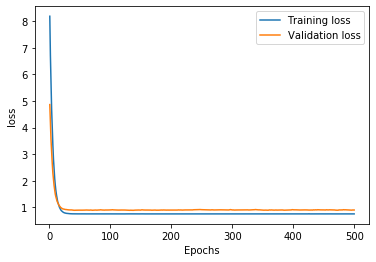

In [37]:
epochs = np.arange(1, 500+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
model.save_weights('simple_weight.h5')

In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

model.load_weights('simple_weight.h5')

In [40]:
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 679us/sample - loss: 0.9471


0.9470952200889587

In [41]:
model.save('simple_model.h5')

In [42]:
model = tf.keras.models.load_model('simple_model.h5')
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 694us/sample - loss: 0.9471


0.9470952200889587

In [43]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath='my_model.h5', monitor='val_loss', save_best_only=True),
                 tf.keras.callbacks.EarlyStopping(patience=5)]
history = model.fit(x_train, y_train, epochs=500, validation_split=0.2, callbacks=callback_list)

Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120 [==============================] - 0s 2ms/sample - loss: 8.6965 - val_loss: 4.7182
Epoch 2/500
120/120 [==============================] - 0s 154us/sample - loss: 7.2260 - val_loss: 3.9015
Epoch 3/500
120/120 [==============================] - 0s 159us/sample - loss: 6.0244 - val_loss: 3.2475
Epoch 4/500
120/120 [==============================] - 0s 164us/sample - loss: 5.0570 - val_loss: 2.7286
Epoch 5/500
120/120 [==============================] - 0s 153us/sample - loss: 4.2667 - val_loss: 2.3038
Epoch 6/500
120/120 [==============================] - 0s 156us/sample - loss: 3.6147 - val_loss: 1.9772
Epoch 7/500
120/120 [==============================] - 0s 176us/sample - loss: 3.0982 - val_loss: 1.7149
Epoch 8/500
120/120 [==============================] - 0s 157us/sample - loss: 2.6801 - val_loss: 1.5040
Epoch 9/500
120/120 [==============================] - 0s 161us/sample - loss: 2.3281 - val_loss: 1.3362
Epoch 10/500

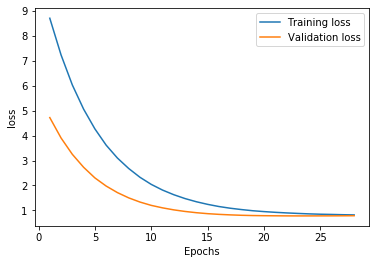

In [44]:
epochs = np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [45]:
model = tf.keras.models.load_model('simple_model.h5')
model.load_weights('my_model.h5')
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 468us/sample - loss: 0.9946


0.9946151375770569

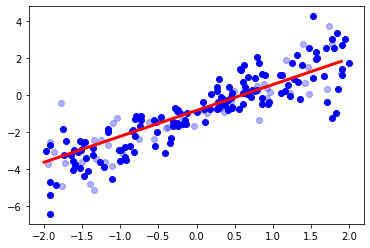

In [46]:
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.show()

In [86]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [94]:
callback_list = [tf.keras.callbacks.TensorBoard(log_dir='logs')]
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    callbacks=callback_list, validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 1ms/sample - loss: 0.7570 - val_loss: 0.9094
Epoch 2/300
105/105 [==============================] - 0s 139us/sample - loss: 0.7568 - val_loss: 0.9088
Epoch 3/300
105/105 [==============================] - 0s 114us/sample - loss: 0.7563 - val_loss: 0.9072
Epoch 4/300
105/105 [==============================] - 0s 117us/sample - loss: 0.7574 - val_loss: 0.9085
Epoch 5/300
105/105 [==============================] - 0s 127us/sample - loss: 0.7567 - val_loss: 0.9078
Epoch 6/300
105/105 [==============================] - 0s 138us/sample - loss: 0.7575 - val_loss: 0.9068
Epoch 7/300
105/105 [==============================] - 0s 120us/sample - loss: 0.7577 - val_loss: 0.9062
Epoch 8/300
105/105 [==============================] - 0s 122us/sample - loss: 0.7568 - val_loss: 0.9041
Epoch 9/300
105/105 [==============================] - 0s 106us/sample - loss: 0.7559 - val_loss: 0.9027
Epoch 10/300

Epoch 78/300
105/105 [==============================] - 0s 107us/sample - loss: 0.7572 - val_loss: 0.9047
Epoch 79/300
105/105 [==============================] - 0s 120us/sample - loss: 0.7557 - val_loss: 0.9046
Epoch 80/300
105/105 [==============================] - 0s 123us/sample - loss: 0.7567 - val_loss: 0.9082
Epoch 81/300
105/105 [==============================] - 0s 107us/sample - loss: 0.7563 - val_loss: 0.9100
Epoch 82/300
105/105 [==============================] - 0s 107us/sample - loss: 0.7580 - val_loss: 0.9081
Epoch 83/300
105/105 [==============================] - 0s 123us/sample - loss: 0.7560 - val_loss: 0.9064
Epoch 84/300
105/105 [==============================] - 0s 129us/sample - loss: 0.7564 - val_loss: 0.9118
Epoch 85/300
105/105 [==============================] - 0s 114us/sample - loss: 0.7571 - val_loss: 0.9088
Epoch 86/300
105/105 [==============================] - 0s 99us/sample - loss: 0.7572 - val_loss: 0.9102
Epoch 87/300
105/105 [=========================

Epoch 155/300
105/105 [==============================] - 0s 119us/sample - loss: 0.7569 - val_loss: 0.9065
Epoch 156/300
105/105 [==============================] - 0s 121us/sample - loss: 0.7576 - val_loss: 0.9112
Epoch 157/300
105/105 [==============================] - 0s 109us/sample - loss: 0.7560 - val_loss: 0.9075
Epoch 158/300
105/105 [==============================] - 0s 117us/sample - loss: 0.7562 - val_loss: 0.9058
Epoch 159/300
105/105 [==============================] - 0s 127us/sample - loss: 0.7573 - val_loss: 0.9037
Epoch 160/300
105/105 [==============================] - 0s 130us/sample - loss: 0.7559 - val_loss: 0.9059
Epoch 161/300
105/105 [==============================] - 0s 127us/sample - loss: 0.7558 - val_loss: 0.9074
Epoch 162/300
105/105 [==============================] - 0s 128us/sample - loss: 0.7556 - val_loss: 0.9083
Epoch 163/300
105/105 [==============================] - 0s 106us/sample - loss: 0.7561 - val_loss: 0.9080
Epoch 164/300
105/105 [==============

105/105 [==============================] - 0s 113us/sample - loss: 0.7570 - val_loss: 0.9093
Epoch 232/300
105/105 [==============================] - 0s 122us/sample - loss: 0.7564 - val_loss: 0.9087
Epoch 233/300
105/105 [==============================] - 0s 115us/sample - loss: 0.7570 - val_loss: 0.9089
Epoch 234/300
105/105 [==============================] - 0s 108us/sample - loss: 0.7567 - val_loss: 0.9072
Epoch 235/300
105/105 [==============================] - 0s 118us/sample - loss: 0.7561 - val_loss: 0.9013
Epoch 236/300
105/105 [==============================] - 0s 125us/sample - loss: 0.7584 - val_loss: 0.8977
Epoch 237/300
105/105 [==============================] - 0s 117us/sample - loss: 0.7571 - val_loss: 0.8928
Epoch 238/300
105/105 [==============================] - 0s 96us/sample - loss: 0.7577 - val_loss: 0.8922
Epoch 239/300
105/105 [==============================] - 0s 107us/sample - loss: 0.7571 - val_loss: 0.8926
Epoch 240/300
105/105 [=============================